In [1]:
from IPython.display import Image

## PyTorch Porject Template Overview

- 개발 초기단계에서는 대화식 개발 과정이 유리 
```
학습과정과 디버깅 등 지속적인 확인, (나는 보통은 여기까지만 하고 끝냈었다..)
```
- 배포 및 공유 단계에서는 notebook 공유의 어려움 
```
쉬운 재현의 어려움, 실행순서 꼬임
```
- DL 코드도 하나의 프로그램
```
개발 용이성 확보와 유지보수 향상 필요!!
```

#### PyTorch Porject Template
실행, 데이터, 모델, 설정, 로깅, 지표, 유틸리티 등 다양한 모듈들을 분리하여 프로젝트 템플릿화

사용할 탬플릿 : https://github.com/victoresque/pytorch-template



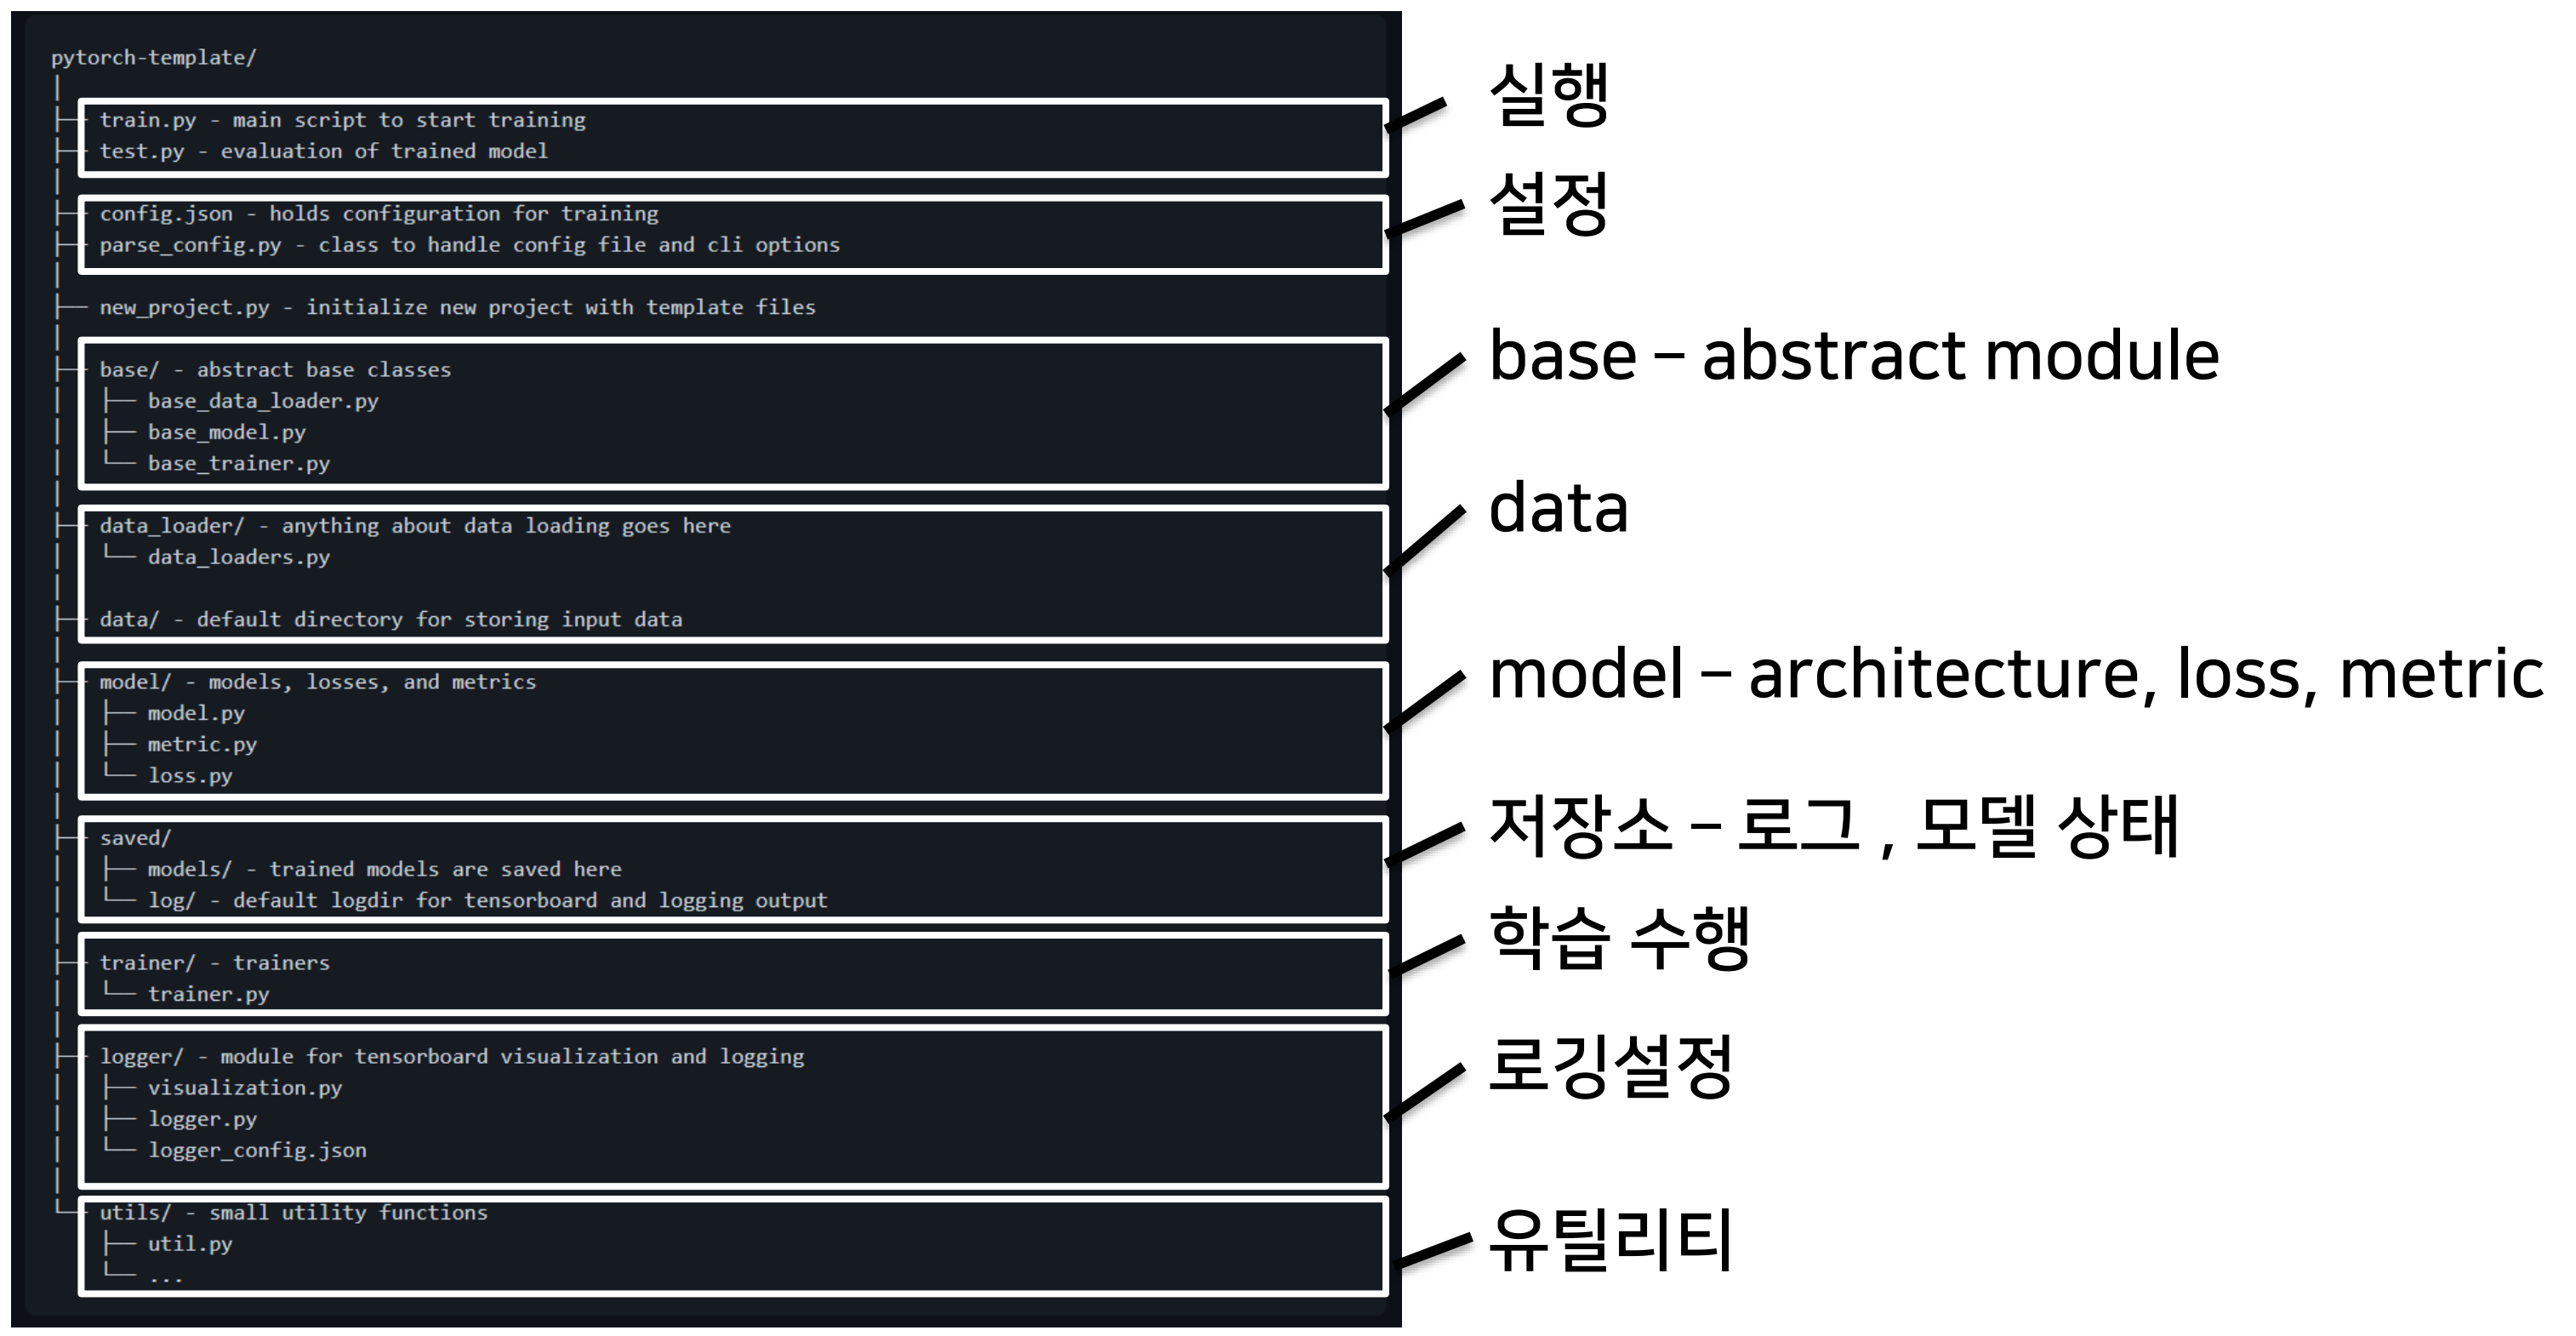

In [6]:
Image('../images/pytorch_template.png')

#### Pytorch-template directory
**Pytorch-template**
* train.py : 학습을 시작하기 위한 main script
* test.py : 평가를 위한 trained model
* config.json , parse_config.py: 설정과 관련된 정보들이 있는 파일들
* new_project.py : 새로운 템플릿을 만들기 위한 시작 파일
* base/ : abstract module 모델 base
    * base_data_loader.py
    * base_model.py : model Architecture
    * base_trainer.py : 실행을 시켜주는 가장 기본적인 트리거, 상속을 위한 클래스
* data_loader/ : 데이터와 관련
    * data_loaders.py 
* data/ : 데이터 저장 폴더
* model/ : model 에 관한 폴더
    * model.py : 모델 저장
    * metric.py : 모델 성능 측정을 어떻게 짤 것인지
    * loss.py : 다양한 loss 함수
* saved/ : 모델 중간 저장소 폴더
    * models/ : 학습된 모델들 저장소
    * log/ : 기본 logdir
* trainer/ 
    * trainer.py : 실제 학습이 시작되는 장소, 학습을 수행하기 위한 트리거 여러가지 설정 모델 저장소 로깅하는 방법등을 넣어서 연결
* logger/ : 로깅을 해주는 폴더
    * visualization.py
    * logger.py
    * logger_config.json
* utils/ : 유틸들
    * util.py
    * ...

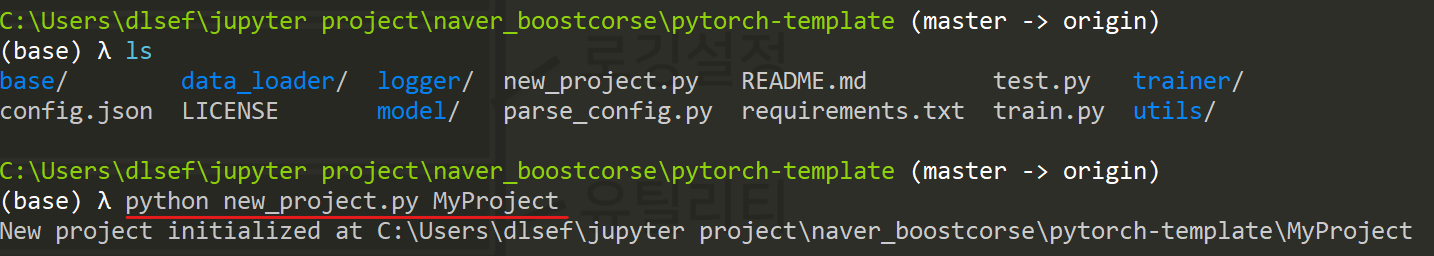

In [7]:
Image('../images/pytorch_template2.png')

new_project.py에 "프로젝트 명"을 매개변수로 넣어주면 프로젝트 디렉토리를 만들어준다.

#### Facttory methods pattern

재료를 넣으면 object(객체)를 생성해주는 패턴, 클래스를 생성하기 위한 패턴이라고 생각하자.

참고 : https://victorydntmd.tistory.com/299

메소드는 클래스의 행위로, 클래스 내의 함수이다.

#### 정적메소드(@classmethod 와 @staticmthod)

참고 : https://journeytosth.tistory.com/73


클래스에서 직접 접근할 수 있는 메소드다. 하지만 파이썬은 다른언어와 다르게 인스턴스에서도 접근이 가능하다.

* 인스턴스 메소드는 첫번째 인자로 객체 자신 self를 입력한다. 
* classmethod는 첫번째 인자로 클래스를 입력하고, staticmethod는 특별히 추가되는 인자가 없다.
* cls를 사용하면 클레스 메서드 내부에서 현재 클래스의 인스턴스를 만들 수도 있다. (cls() = 현재클래스명() 를 의미)

In [10]:
class CustomClass:
    # instance method
    def add_instance_method(self, a,b):
        return a + b

    # classmethod
    @classmethod
    def add_class_method(cls, a, b):
        return a + b

    # staticmethod
    @staticmethod
    def add_static_method(a, b):
        return a + b

`__getitem__`
**슬라이싱을 구현**할 수 있게 하며, 리스트에서 슬라이싱을 하게 되면 내부적으로 `__getitem__` 메소드를 실행한다.

In [11]:
class Test(object):
    def __getitem__(self, items): 
        """여기선 __getitem__을 메소드 오버라이딩 한다."""
        print(type(items), items)
test = Test()
test[5]
test[5:65:5]
test['GeeksforGeeks']
test[1, 'x', 10.0]
test['a':'z':2]
test[object()]

<class 'int'> 5
<class 'slice'> slice(5, 65, 5)
<class 'str'> GeeksforGeeks
<class 'tuple'> (1, 'x', 10.0)
<class 'slice'> slice('a', 'z', 2)
<class 'object'> <object object at 0x00000153737A2480>


#### **get attribute**를 쓰는 이유

모듈이나 클래스를 부를려면 이름을 직접 하드코딩해야 하기에, 코드의 수정을 최소화 하기 위해 config.json와 같은 설정파일만 바꿔서 작업할 수 있기 때문이다. 